# problema 9.2

escriba un programa o modifique el ejemplo de la ecuacion de laplace para resolver la ecuacion de poisson para una placa rectangular con dos cargas, trabaje con las unidades $\varepsilon _{0}=1$ y continue hasta que su solucion de potencial electrico cambie a menos de 10e-6 V vaya en cada punto de la cuadricula 

la ecuacion que debemos emplear queda de la forma 
\begin{equation}
\phi (x,y)=\frac{1}{4}\left [ \phi (x+a,y)+\phi (x-a,y) +\phi (x,y+a)+\phi (x,y+a)\right ]+\frac{a^{2} \rho (x,y)}{4\varepsilon _{o}}
\end{equation}

debemos tener en cuenta que para realizar este programa escogimos una matriz para las cargas la cual debe estar oscilando para $\rho$ 

In [1]:
from scipy import array, arange, pi, sin, cos
from pylab import plot, show, xlabel, ylabel, imshow, gray, inferno 
from vpython import cylinder, vector, sphere, rate
from numpy import empty,zeros,max


<IPython.core.display.Javascript object>

In [2]:

# cosntantes 
M= 100 # 
V= 5.0 # voltaje de la cargas
target= 1e-2 # la tolerancia 
# crear arreglos y evaluar potencial 
phi= zeros([M+1,M+1],float ) # matriz inicial define la caja rectangualar 
rho= zeros([M+1,M+1],float ) # definimos una matriz para las cargas puntuales 
rho[60:80,20:40]=V  # carga uno en la posicion definida
rho[20:40,60:80]=-V # carga dos en la posicion definida
phiprime=empty([M+1,M+1],float ) # matriz donde se guardan los valores nuevos 

delta=1.0 # inicializa el contador 
a=1 
ep0=1    

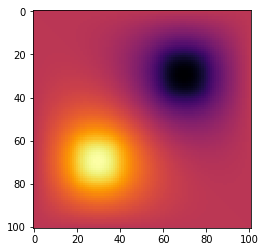

In [3]:

while delta>target:
    
        #calcular los nuevos valores del potencial 
    for i in range(M+1):
         for j in range(M+1):
            if i==0 or i==M or j==0 or  j==M:  # algunas condiciones iniciales 
                phiprime[i,j]=phi[i,j]
            else: # la funcion que definimos  de poisson
                phiprime[i,j]=((phi[i+a,j]+phi[i-a,j]+phi[i,j+a]+phi[i,j-a])/4 )+ (a**2/4*ep0)*rho[i,j]
                
    delta=max(abs(phi-phiprime)) # comparador para ver si ya termina el proceso 
    phi,phiprime=phiprime,phi # cambios de posiciones en las variables 
                       
# plotear                     
imshow(phi)
inferno()
show()                
    

ahora vemos como se grafico el potencial en la caja rectangular partiendo de los condiciones de cargas y la ecuacion de poisson los colores de deben a que escojimos una carga positiva y otra negativa 